# Task 1

## Preprocessing


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
bird_data = pd.read_csv('birds.csv')
print(bird_data.columns)

Index(['gender', 'body_mass', 'beak_length', 'beak_depth', 'fin_length',
       'bird category'],
      dtype='object')


In [20]:
#checking nulls
bird_data.isnull().sum()

gender           6
body_mass        0
beak_length      0
beak_depth       0
fin_length       0
bird category    0
dtype: int64

In [21]:
bird_data['gender'] = bird_data['gender'].fillna(bird_data['gender'].mode()[0])
bird_data.isnull().sum()

gender           0
body_mass        0
beak_length      0
beak_depth       0
fin_length       0
bird category    0
dtype: int64

In [22]:
#checking duplicates
duplicates =bird_data.duplicated(keep=False)
duplicates.sum()

0

In [24]:
#spliting and cleaning actually 0-0
def splitData(classes,features):
    #filter classes
    filtered_bird_data=bird_data[bird_data['bird category'].isin(classes)]
    X=filtered_bird_data.drop(columns='bird category')
    Y=filtered_bird_data['bird category']
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4,stratify=Y,shuffle=True)
    #filter features
    X_train=X_train[features]
    X_test=X_test[features]
    
    #encoding the categorical values
    if 'gender' in X_train.columns:
        enconder = LabelEncoder()
        X_train['gender'] = enconder.fit_transform(X_train['gender'])
        X_test['gender']=enconder.transform(X_test['gender'])
        y_train = enconder.fit_transform(y_train)
        y_test = enconder.transform(y_test)


    #scaling the data
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    X_train[[col for col in X_train.columns if col != 'gender']] = scaler.fit_transform(
    X_train[[col for col in X_train.columns if col != 'gender']]
    )
    X_test[[col for col in X_test.columns if col != 'gender']] = scaler.fit_transform(
    X_test[[col for col in X_test.columns if col != 'gender']]
    )
    y_train = scaler.fit_transform(y_train)
    y_test = scaler.transform(y_test)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test=splitData(['A','B'],['gender','body_mass']) 

## Logic

In [25]:
#activation function
def signum(x):
    if x>0:
        return 1
    elif x<0:
        return -1
    else:
        return 0
      

In [55]:

def preceptron(epochs,eta,mse_threshold,is_bias):
    train_features=X_train.to_numpy()
    if is_bias: 
        train_features=np.column_stack((np.ones((train_features.shape[0],1)),train_features))
        
    weights=np.random.rand(train_features.shape[1])
    
    for epoch in range(epochs):
        preds=[]
        for i in range(len(train_features)):
            x=np.dot(train_features[i],weights)
            predection=signum(x)
            preds.append(predection)
            error=y_train[i]-predection
            if error!=0:
                weights+=eta*error*train_features[i]

        mse=np.mean((y_train - np.dot(train_features, weights))**2)
        if mse<mse_threshold:
            break

    return weights,preds    
             
weights,predPercepton=preceptron(1000,0.001,0.02,False)


In [ ]:

def adaline(epochs,eta,mse_threshold,is_bias):
    train_features=X_train.to_numpy()

    if is_bias: 
        train_features=np.column_stack((np.ones((train_features.shape[0],1)),train_features))
        
    weights=np.random.rand(train_features.shape[1])
    
    for epoch in range(epochs):
        preds=[]
        total_error=0
        for i in range(len(train_features)):
            x=np.dot(train_features[i],weights)
            error=y_train[i]-x       
            total_error+=error+train_features[i]
            preds.append(np.dot(train_features[i],weights)) 
        weights+=eta*(total_error/len(train_features))*train_features[i]
        mse=np.mean((y_train - np.dot(train_features, weights))**2)
        if mse<mse_threshold:
            break

    return weights,preds   
             
weights,predAdaline=adaline(1000,0.001,0.02,False)

In [28]:
#test function on both models
def test(is_bias):
    test_features = X_test.to_numpy()
    TP=0
    TN=0
    FP=0
    FN=0
    if is_bias:
        test_features = np.column_stack((np.ones((test_features.shape[0], 1)), test_features))
    
    for i in range(len(test_features)):
        predection=signum(np.dot(test_features[i], weights))
        if predection>0 and y_test[i]>0:
            TP+=1
        elif predection<0 and y_test[i]<0:
            TN+=1
        elif predection>0 and y_test[i]<0:
            FP+=1
        else:
            FN+=1            

    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    error=round((FP+FN)/len(X_train),4)
    return error,confusion_matrix
error,confusion_matrix= test(False)
print(error, confusion_matrix)




0.25 [[15 10]
 [ 5 10]]


## Plot

(2,)


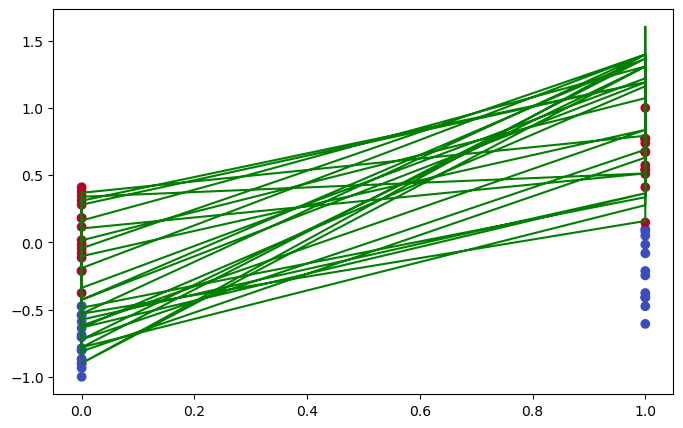

In [97]:
print(weights.shape)
plt.figure(figsize=(8,5))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='coolwarm')
plt.plot(X_train.iloc[:, 0],X_train.iloc[:,0]*weights[0]+X_train.iloc[:,1]*weights[1],color='green',label='adaline best line')
plt.show()

## GUI

#variable of GUI

In [75]:
import tkinter as tk
from tkinter import ttk

root = tk.Tk()
root.configure(background="#252938")
root.title("Simple Layer Perceptron")
root.geometry("1280x720") 

accuracyResult = 0
accuracyString = f"{accuracyResult}%"
first_class = 'A'
second_class = 'B'
TP = 0
FP = 0
TN = 0
FN = 0
actualStr = f"{first_class}     Actual      {second_class}"

learning_rate_input = tk.StringVar()
MSE_threshold_input = tk.StringVar()
epochs_input = tk.StringVar()


In [76]:

root.grid_rowconfigure(0, weight=35, minsize=500)  
root.grid_rowconfigure(1, weight=5) 
root.grid_columnconfigure(0, weight=9) 
root.grid_columnconfigure(1, weight=4, minsize=350)  

frame1 = tk.Frame(root, bg="#2C3546")
frame1.grid(row=0, column=0, sticky="nsew", padx=(30, 15), pady=(30, 15))

frame2 = tk.Frame(root, bg="#2C3546")
frame2.grid(row=1, column=0, sticky="nsew", padx=(30, 15), pady=(15, 30))

frame3 = tk.Frame(root, bg="#2C3546")
frame3.grid(row=0, column=1, rowspan=2, sticky="nsew", padx=(15, 30), pady=30)


accuracy_frame = tk.Frame(frame3, bg="#2C3546")
accuracy_frame.pack(pady=20, anchor='nw', fill='x')  


accuracy_label = tk.Label(accuracy_frame, text="Accuracy", bg="#2C3546", fg="#C3C3C3", font=("Poppins SemiBold", 20))
accuracy_label.pack(anchor="nw", pady=(0, 5), padx=20)  

result_frame = tk.Frame(accuracy_frame, bg="#2C3546")
result_frame.pack(fill='x')  

accuracy_Res = tk.Label(result_frame, text=accuracyString, bg="#2C3546", fg="#00C7AE", font=("Poppins SemiBold", 64))
accuracy_Res.pack(anchor="center")

actualLabel = tk.Label(result_frame, text=actualStr, bg="#2C3546", fg="#C3C3C3", font=("Poppins SemiBold", 16))
actualLabel.pack(anchor="center", pady=(60, 0)) 

left_frame = tk.Frame(frame3, bg="#2C3546")
left_frame.pack(side='left', fill='both', expand=True)

color_frame = tk.Frame(left_frame, bg="#2C3546")
color_frame.pack(pady=(0, 150), padx=60, anchor='center', fill='both', expand=True)

color1 = tk.Frame(color_frame, bg="#4591BD")
color1.grid(row=0, column=0, sticky="nsew")

color2 = tk.Frame(color_frame, bg="#DBEAF2")
color2.grid(row=0, column=1, sticky="nsew")

color3 = tk.Frame(color_frame, bg="#A7CBE0")
color3.grid(row=1, column=0, sticky="nsew")

color4 = tk.Frame(color_frame, bg="#6FAACC")
color4.grid(row=1, column=1, sticky="nsew")

color_frame.grid_rowconfigure(0, weight=1)
color_frame.grid_rowconfigure(1, weight=1)
color_frame.grid_columnconfigure(0, weight=1)
color_frame.grid_columnconfigure(1, weight=1)

vertical_label1 = tk.Label(left_frame, text="A", bg="#2C3546", fg="#C3C3C3", font=("Poppins SemiBold", 16))
vertical_label2 = tk.Label(left_frame, text="B", bg="#2C3546", fg="#C3C3C3", font=("Poppins SemiBold", 16))


vertical_label1.place(relx=0.1, rely=0.1, anchor='center') 
vertical_label2.place(relx=0.1, rely=0.5, anchor='center')  


label1 = tk.Label(color1, text=TP, bg="#4591BD", fg="#FFFFFF", font=("Poppins SemiBold", 16))
label1.pack(expand=True)

label2 = tk.Label(color2, text=FP, bg="#DBEAF2", fg="#000000", font=("Poppins SemiBold", 16))
label2.pack(expand=True)

label3 = tk.Label(color3, text=FN, bg="#A7CBE0", fg="#000000", font=("Poppins SemiBold", 16))
label3.pack(expand=True)

label4 = tk.Label(color4, text=TN, bg="#6FAACC", fg="#FFFFFF", font=("Poppins SemiBold", 16))
label4.pack(expand=True)

combo_frame = tk.Frame(frame2, bg="#2C3546")
combo_frame.grid(row=0, column=0, padx=(20, 20), pady=(35, 20), sticky="nsew")


style = ttk.Style()
style.configure("Custom.TCombobox",
                font=("Poppins SemiBold", 24), 
                foreground="#1e1e1e",
                background="#2C3546",
                fieldbackground="#2C3546", 
                bordercolor="#C3C3C3",
                relief="flat")

combo_label1 = tk.Label(combo_frame, text="Classes:", bg="#2C3546", fg="#00C7AE", font=("Poppins SemiBold", 16))
combo_label1.pack(anchor="w")

classes_options = ["A, B", "A, C", "B, C"]
combo_box1 = ttk.Combobox(combo_frame, values=classes_options, state="readonly", style="Custom.TCombobox")
combo_box1.set("Select classes combination")
combo_box1.pack(pady=(0, 10))

combo_label2 = tk.Label(combo_frame, text="Features:", bg="#2C3546", fg="#00C7AE", font=("Poppins SemiBold", 16))
combo_label2.pack(anchor="w")

features_options = ["Gender & Body mass", "Gender & Beak length", "Gender & Beak depth", "Gender & fin length", 
                  "Body mass & Beak length", "Body mass & Beak depth", "Body mass & fin length", "Beak length & Beak depth", 
                  "Beak length & fin length", "Beak depth & fin length"
                ]
combo_box2 = ttk.Combobox(combo_frame, values=features_options, state="readonly", style="Custom.TCombobox")
combo_box2.set("Select features combination") 
combo_box2.pack(pady=(0, 10))


entry_frame = tk.Frame(frame2, bg="#2C3546")
entry_frame.grid(row=0, column=1, padx=(20, 10), sticky="nsew", pady=(30, 20))

entry_label1 = tk.Label(entry_frame, text="Learning rate:", bg="#2C3546", fg="#00C7AE", font=("Poppins SemiBold", 16))
entry_label1.grid(row=0, column=0, sticky="w", pady=(0, 5))

entry1 = tk.Entry(entry_frame, textvariable=learning_rate_input, font=("Poppins SemiBold", 14),
                   bd=2, highlightthickness=1, highlightbackground="#C3C3C3", highlightcolor="#C3C3C3", bg="#2C3546", fg="#00C7AE")
entry1.grid(row=0, column=1, pady=(0, 10))
entry1.insert(0," ")

entry_label2 = tk.Label(entry_frame, text="MSE threshold:", bg="#2C3546", fg="#00C7AE", font=("Poppins SemiBold", 16))
entry_label2.grid(row=1, column=0, sticky="w", pady=(10, 5))

entry2 = tk.Entry(entry_frame, textvariable=MSE_threshold_input, font=("Poppins SemiBold", 14),
                   bd=2, highlightthickness=1, highlightbackground="#C3C3C3", highlightcolor="#C3C3C3", bg="#2C3546", fg="#00C7AE")
entry2.grid(row=1, column=1, pady=(0, 10))
entry2.insert(0," ")


entry_label3 = tk.Label(entry_frame, text="Epochs:", bg="#2C3546", fg="#00C7AE", font=("Poppins SemiBold", 16))
entry_label3.grid(row=2, column=0, sticky="w", pady=(10, 5)) 

entry3 = tk.Entry(entry_frame, textvariable=epochs_input, font=("Poppins SemiBold", 14),
                   bd=2, highlightthickness=1, highlightbackground="#C3C3C3", highlightcolor="#C3C3C3", bg="#2C3546", fg="#00C7AE")
entry3.grid(row=2, column=1, pady=(0, 5))
entry3.insert(0," ")


checkbox_frame = tk.Frame(frame2, bg="#2C3546")
checkbox_frame.grid(row=0, column=2, padx=(50, 0), sticky="nsew", pady=(25, 10)) 

adaline_var = tk.BooleanVar()
checkbox1 = tk.Checkbutton(checkbox_frame, text="Adaline", variable=adaline_var, bg="#2C3546", fg="#00C7AE", font=("Poppins SemiBold", 16), selectcolor="#2C3546", activebackground="#2C3546", bd=2, highlightthickness=1, highlightbackground="#C3C3C3")
checkbox1.pack(anchor="w", pady=(0, 5)) 

bias_var = tk.BooleanVar()
checkbox2 = tk.Checkbutton(checkbox_frame, text="Bias", variable=bias_var, bg="#2C3546", fg="#00C7AE", font=("Poppins SemiBold", 16), selectcolor="#2C3546", activebackground="#2C3546", bd=2, highlightthickness=1, highlightbackground="#C3C3C3")
checkbox2.pack(anchor="w", pady=(0, 20)) 


# # Button
# submit_button = tk.Button(checkbox_frame, text="Submit", bg="#00C7AE", fg="#FFFFFF", font=("Poppins SemiBold", 16))
# submit_button.pack(pady=(0, 5))  # Align center below checkboxes


def on_submit():
    print("Submitted!")

def create_rounded_button(parent, text, command, radius=20, width=150, height=40, bg_color="#00C7AE", fg_color="white"):
    canvas = tk.Canvas(parent, width=width, height=height, bg="#2C3546", highlightthickness=0)

    def draw_button(bg_color):
        canvas.delete("all")

        canvas.create_arc((0, 0, radius * 2, radius * 2), start=90, extent=180, fill=bg_color, outline=bg_color)
        canvas.create_arc((width - radius * 2, 0, width, radius * 2), start=0, extent=180, fill=bg_color, outline=bg_color)
        canvas.create_arc((0, height - radius * 2, radius * 2, height), start=180, extent=180, fill=bg_color, outline=bg_color)
        canvas.create_arc((width - radius * 2, height - radius * 2, width, height), start=270, extent=180, fill=bg_color, outline=bg_color)
        
        canvas.create_rectangle((radius, 0, width - radius, height), fill=bg_color, outline=bg_color)
        canvas.create_rectangle((0, radius, width, height - radius), fill=bg_color, outline=bg_color)

        canvas.create_text(width // 2, height // 2, text=text, fill=fg_color, font=("Poppins SemiBold", 14))

    draw_button(bg_color)

    def on_button_press(event):
        draw_button("#006A97")

    def on_button_release(event):
        draw_button(bg_color)
        command()

    canvas.bind("<ButtonPress-1>", on_button_press)
    canvas.bind("<ButtonRelease-1>", on_button_release)
    canvas.pack(pady=(10, 0))

    return 

create_rounded_button(checkbox_frame, "Submit", on_submit)

root.mainloop()
